# Step 1. Open the data file and have a look at the general information

In [135]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
# read all input data
data_real_estate = pd.read_csv("real_estate_data_us.csv", sep='\t')

In [137]:
# brief information about input data
data_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_posted        23699 non-null  object 
 1   days_listed        20518 non-null  float64
 2   last_price         23699 non-null  float64
 3   bedrooms           23699 non-null  int64  
 4   kitchen_area       21421 non-null  float64
 5   living_area        21796 non-null  float64
 6   total_area         23699 non-null  float64
 7   balconies          12180 non-null  float64
 8   ceiling_height     14504 non-null  float64
 9   floors_total       23613 non-null  float64
 10  floor              23699 non-null  int64  
 11  total_images       23699 non-null  int64  
 12  bike_parking       2775 non-null   object 
 13  is_studio          23699 non-null  bool   
 14  is_open_plan       23699 non-null  bool   
 15  locality_name      23650 non-null  object 
 16  airport_dist       181

In [138]:
data_real_estate.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


# Mini-Conclusion
There are 23699 rows and 22 columns. Some general points without close inspection:
1. *date_posted* is string not date **need to do something**.
2. *days_listed* is float not integer **easy to change**. 20518 rows < 23699 **need to do something**.
3. *last_price* OK
4. *bedrooms* OK
5. *kitchen_area* 21421 rows < 23699 **need to do something**
6. *living_area* 21796 rows < 23699 **need to do something**
7. *total_area* OK. **question** why total area is given for all data as opposed to kitchen and living area
8. *balconies* 12180 < 23699 **need to do something**
9. *ceiling_height* 14504 < 23699 **need to do something**
10. *floors_total* is float not integer **easy to change**. 23613 < 23699 **need to do something**
11. *floor* OK
12. *total_images* OK
13. *bike_parking* 2775 << 23699 **need to do something**
14. *is_studio* OK  
15. *is_open_plan* OK   
16. *locality_name* 23650 < 23699 **need to do something**
17. *airport_dist* 18157 < 23699 **need to do something**
18. *city_center_dist* 18180 < 23699 **need to do something**
19. *park_dist* 8079 < 23699 **need to do something**
20. *parks_within_3000* is float not integer **easy to change**. 18181 < 23699 **need to do something**
21. *pond_dist* 9110 < 23699 **need to do something**
22. *ponds_within_3000*  is float not integer **easy to change**. 18181 < 23699 **need to do something**


<div class="alert alert-block alert-success">
Sounds right
</div>

# Step 2. Data preprocessing

* Identify and study the missing values:
    * For some missing values, the replacement is obvious. For
example, if the user doesn’t enter the number of balconies, then there
probably aren’t any. The correct course of action here is to replace
these missing values with 0. There’s no suitable replacement value for
other data types. In this case, leave these values blank. A missing value
is also a key indicator that mustn’t be hidden.
    * Fill in the missing values where appropriate. Explain why you’ve chosen
to fill the missing values in these particular columns and how you
selected the values.
    * Describe the factors that may have led up to the missing values.
* Convert the data to the required types:
    * Indicate the columns where the data types have to be changed and
explain why.

### 1. *date_posted* 
1. *date_posted* presents a date; so I'll convert strings to datetime64[ns] <br>
2. There are no missing values

In [139]:
data_real_estate['date_posted'] = pd.to_datetime(data_real_estate['date_posted'], format='%Y-%m-%dT%H:%M:%S')

### 2. *days_listed*
1. *days_listed* presents the number of days; it is countable (natural numbers), so it is better to use integer_type
2. (comment) but there are None-values; I can't directly convert this column to int using df.astype(); I tried, really, it doesn't work :)
3. (comment) I can't use try:_except:_ and change type of each row with int(); because it doesn't change type of data in column; I tried :)
4. I see two solutions:
        a. Use fillna() with, for instance, 0-value; zeros aren't used here, so it would be unique; then apply astype('int').
        b. convert None-values to np.nan; then use astype('int').
I choose 4a.

In [140]:
data_real_estate['days_listed'].fillna(value=0, inplace=True)
print('Number of zeros is {:}'.format(data_real_estate[data_real_estate['days_listed'] == 0]['days_listed'].count()))

Number of zeros is 3181


In [141]:
# convert to integer
data_real_estate['days_listed'] = data_real_estate['days_listed'].astype('int')

### 3. *kitchen_area*, *living_area*


There are few empty cells in these columns. <br>
I could replace None-values with a group median divided by *total_area*. Why *total_area*? Apparently there should be a strong correlation between *total_area* and *kitchen_area*, *living_area*. The larger the area of a room, the larger the total area the apartment. <br>

Text(0, 0.5, 'total_area')

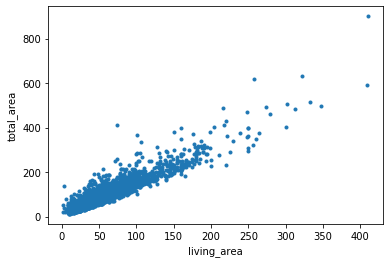

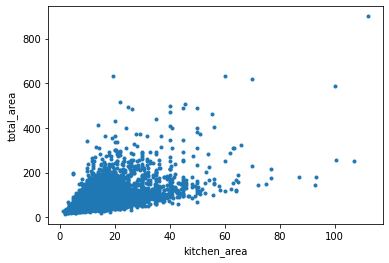

In [142]:
# let's see whether there is a strong correlation
plt.figure()
x = data_real_estate.living_area
y = data_real_estate.total_area
plt.plot(x,y,'.')
plt.xlabel('living_area')
plt.ylabel('total_area')


plt.figure()
x = data_real_estate.kitchen_area
y = data_real_estate.total_area
plt.plot(x,y,'.')
plt.xlabel('kitchen_area')
plt.ylabel('total_area')

We can see that figure *total_area* from *living_area* is not so scattered. It is narrower than function from *living_area*. <br>
I think the best way is to find a linear function which gives the best approximation. Thus we can find a good tool to make up for the none-values for kitchens and living rooms. But we haven't study this so far. So I'll create groups for *living_area* and find the median in each group.

In [143]:
# determine a function to use apply() later to create a new area category
def fun_area_category(row):
    area = row.total_area
    step = (max_total_area - 0.) / num_area_category
    for k in range(num_area_category):
        if k*step<= area < (k+1)*step:
            return 'area_' + str(k)
    return 'area_' + str(num_area_category)

In [144]:
# create a new area_category describing total_area
num_area_category = 20
max_total_area = max(data_real_estate['total_area'])
data_real_estate['area_category'] = data_real_estate.apply(fun_area_category, axis=1)

We can see that this approach is disadvantageous. The data is really scattered, so we didn't have a detailed solution in the beginning close to zero. I can (a) increase number of area categories or (b) move away from zero. But I think the solution is good enough. <br>
Another thing is that I used two global parameters num_area_category and max_total_area in function. I don't understand is it OK? or I should find a way to avoid using them.

In [145]:
# save median values for each group for living area
living_area_category_median = data_real_estate.groupby('area_category')['living_area'].median().sort_values()

# define function to use apply() later to update area of living room
def area_living_update(row):
    area = row['living_area']
    area_category = row['area_category']
    
    if not(pd.isnull(area)):
        return area
    else:
        for k in range(num_area_category):
            if area_category == living_area_category_median.index[k]:
                return living_area_category_median[k]

# update column if living area
data_real_estate['living_area'] = data_real_estate.apply(area_living_update, axis=1)

In [146]:
# save median values for each group for kitchen area
kitchen_area_category_median = data_real_estate.groupby('area_category')['kitchen_area'].median().sort_values()

# define function to use apply() later to update kitchen area
def area_kitchen_update(row):
    area = row['kitchen_area']
    area_category = row['area_category']
    
    if not(pd.isnull(area)):
        return area
    else:
        for k in range(num_area_category):
            if area_category == kitchen_area_category_median.index[k]:
                return kitchen_area_category_median[k]

# update column if living area
data_real_estate['kitchen_area'] = data_real_estate.apply(area_kitchen_update, axis=1)

### 4. *balconies*

In [147]:
# if the user doesn’t enter the number of balconies, then there probably aren’t any.
# The correct course of action here is to replace these missing values with 0.
data_real_estate['balconies'].fillna(0, inplace=True)

In [148]:
# convert to integer
data_real_estate['balconies'] = data_real_estate['balconies'].astype('int')

### 5. *ceiling_height*

Ceiling height doesn't depend on other parameters. Approximately 50% of data is absent. We'll leave the column as it is.

In [149]:
data_real_estate.ceiling_height.unique()
print('Number of unique values: {:}'.format(len(data_real_estate.ceiling_height.unique())))

Number of unique values: 184


### 6. *floors_total*

In [150]:
# show unique values
data_real_estate['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [151]:
# I don't see zeros. I will temporarily fillna() with zeroes. This is needed to convert float values to integer.
data_real_estate['floors_total'].fillna(0, inplace=True)

In [152]:
# convert to integer
data_real_estate['floors_total'] = data_real_estate['floors_total'].astype('int')

In [153]:
# show all None (now zero) values, maybe I will see how to update this column
data_real_estate.query('floors_total == 0').head(10)

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,area_category
186,2018-10-02,49,232800.0,2,12.00,30.80,65.20,0,NaN,0,...,False,False,Saint Petersburg,39197.0,12373.0,123.0,1.0,NaN,0.0,area_1
237,2016-11-23,251,48761.0,1,8.30,20.75,28.10,0,NaN,0,...,False,False,Saint Petersburg,22041.0,17369.0,NaN,0.0,374.0,1.0,area_0
457,2015-08-01,727,195767.0,2,10.63,38.40,70.80,0,NaN,0,...,False,False,Saint Petersburg,37364.0,8322.0,309.0,2.0,706.0,2.0,area_1
671,2017-04-06,123,121024.0,3,16.80,47.10,93.60,0,NaN,0,...,False,False,Saint Petersburg,22041.0,17369.0,NaN,0.0,374.0,1.0,area_2
1757,2017-04-22,77,72000.0,1,8.30,18.00,39.00,0,NaN,0,...,False,False,Saint Petersburg,22735.0,11618.0,835.0,1.0,652.0,1.0,area_0
1930,2016-05-13,90,195000.0,2,9.00,35.00,66.77,0,NaN,0,...,False,False,Saint Petersburg,39886.0,10660.0,2276.0,1.0,244.0,3.0,area_1
2392,2017-06-29,48,107915.0,2,9.00,29.00,53.00,0,NaN,0,...,False,False,Saint Petersburg,43074.0,10820.0,NaN,0.0,NaN,0.0,area_1
2846,2016-09-21,307,46500.0,1,8.30,19.40,27.80,0,NaN,0,...,False,False,Saint Petersburg,22041.0,17369.0,NaN,0.0,374.0,1.0,area_0
2952,2019-04-23,0,130000.0,1,12.30,22.20,54.30,0,NaN,0,...,False,False,Saint Petersburg,23606.0,3148.0,NaN,0.0,NaN,0.0,area_1
3031,2018-03-27,231,128000.0,2,12.00,32.00,56.70,0,NaN,0,...,False,False,Kudrovo,NaN,NaN,NaN,NaN,NaN,NaN,area_1


Nothing special I can see here. It is hard to reveal some dependences using only data-table. Maybe later I will see something interesting.

### 7. *bike_parking*, *locality_name*, *airport_dist*, *city_center_dist*, *park_dist* and *pond_dist*

Nothing to do. There is no some data. But I can't just fill None by random values.

### 8. *parks_within_3000* and *ponds_within_3000*

In [154]:
print(data_real_estate['parks_within_3000'].unique())
print(data_real_estate['ponds_within_3000'].unique())

[ 1.  0.  2. nan  3.]
[ 2.  0.  3.  1. nan]


In [155]:
# I don't see 10. I will temporarily fillna() with 10. I want to do it to convert float values with integer.
data_real_estate['parks_within_3000'].fillna(10, inplace=True)
data_real_estate['ponds_within_3000'].fillna(10, inplace=True)

In [156]:
data_real_estate['parks_within_3000'] = data_real_estate['parks_within_3000'].astype('int')
data_real_estate['ponds_within_3000'] = data_real_estate['ponds_within_3000'].astype('int')

In [157]:
data_real_estate[data_real_estate['parks_within_3000'] == 10]['parks_within_3000'] = None
data_real_estate[data_real_estate['ponds_within_3000'] == 10]['ponds_within_3000'] = None

C:\Users\tyala\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\tyala\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


FAIL! While there is None, this column can't be integer.

### 9. *bedrooms*
I noticed that there are several apartments with 0-values in *bedrooms* column <br>
I think that I can do something with this data.

In [158]:
data_real_estate.query('bedrooms == 0').head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,area_category
144,2017-03-30,181,49000.0,0,8.3,15.50,27.00,2,NaN,24,...,True,False,Murino village,NaN,NaN,NaN,10,NaN,10,area_0
349,2017-09-27,45,46400.0,0,8.3,17.00,25.00,0,NaN,14,...,False,True,Kudrovo village,NaN,NaN,NaN,10,NaN,10,area_0
440,2018-03-12,64,49600.0,0,8.3,24.75,27.11,2,NaN,17,...,True,False,Saint Petersburg,38171.0,15015.0,NaN,0,982.0,2,area_0
508,2017-03-28,430,67500.0,0,8.3,24.30,34.40,1,NaN,26,...,False,True,Pargolovo village,53115.0,19292.0,NaN,0,593.0,1,area_0
608,2019-02-20,29,37000.0,0,8.3,18.00,25.00,0,NaN,10,...,True,False,Shushary village,NaN,NaN,NaN,10,NaN,10,area_0


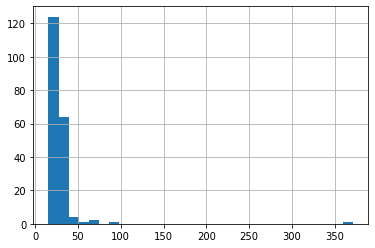

In [159]:
# I have noticed that total_area is rather small
# build a histogram
data_real_estate.query('bedrooms == 0')['total_area'].hist(bins=30)

Most of this data has relatively small total area.

In [160]:
# group by number of bedrooms and define median total area in each group
bedrooms_area_const = data_real_estate.query('bedrooms != 0').groupby('bedrooms')['total_area'].median()
print(bedrooms_area_const)

bedrooms
1      36.56
2      53.00
3      73.00
4      99.30
5     146.45
6     184.30
7     214.00
8     235.70
9     300.95
10    272.60
11    188.90
12    900.00
14    304.20
15    590.00
16    270.00
19    374.60
Name: total_area, dtype: float64


In [161]:
bedrooms_area_const[1] * 1.1

40.21600000000001

In [162]:
# As expected apartments with only 1 bedroom have small total area - below 40 m2
# Now I have what I need to do an update
def update_bedrooms(row):
    beds = row['bedrooms']
    area = row['total_area']
    
    if beds != 0:
        return beds
    else:
        if area < (bedrooms_area_const[1] + bedrooms_area_const[2]) / 2:
            return 1
        elif area < (bedrooms_area_const[2] + bedrooms_area_const[3]) / 2:
            return 2
        elif area < (bedrooms_area_const[3] + bedrooms_area_const[4]) / 2:
            return 3
        elif area < (bedrooms_area_const[4] + bedrooms_area_const[5]) / 2:
            return 4
    return 0

data_real_estate['bedrooms'] = data_real_estate.apply(update_bedrooms, axis=1)

In [163]:
data_real_estate.query('bedrooms == 0')

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,area_category
19392,2018-07-26,90,1420000.0,0,34.365,222.0,371.0,0,3.57,7,...,False,True,Saint Petersburg,25257.0,6060.0,761.0,1,584.0,1,area_8


Last apartment has 371 m2. In fact it is hard to understand how many bedrooms are in it. But it is the only value. Maybe it will not be a big mistake to assign some random value.

In [164]:
data_real_estate.loc[19392, 'bedrooms'] = 19

# RESULTS of Step 2.
I have changed some types and fill in some columns None-values.

<div class="alert alert-block alert-success">
Great job so far!
</div>

# Step 3. Make calculations and add the following entries to the table:
* the price per square meter
* the day of the week, month, and year that the ad was published
* which floor the apartment is on (first, last, or other)
* the ratio between the living space and the total area, as well as between the kitchen space and the total area.

In [165]:
# the price per square meter
data_real_estate['price2sq'] = data_real_estate['last_price'] / data_real_estate['total_area']

# the day of the week, month, and year that the ad was published
data_real_estate['day_of_week'] = data_real_estate['date_posted'].dt.weekday
data_real_estate['month'] = data_real_estate['date_posted'].dt.month
data_real_estate['year'] = data_real_estate['date_posted'].dt.year

# which floor the apartment is on (first, last, or other)
def fun_floor_category(row):
    floor = row['floor']
    total_floor = row['floors_total']
    if floor == 1:
        return 'first'
    elif floor == total_floor:
        return 'last'
    else:
        return 'other'
data_real_estate['floor_category'] = data_real_estate.apply(fun_floor_category, axis=1)

# the ratio between the living space and the total area, as well as between the kitchen space and the total area
data_real_estate['ratio_living_area'] = data_real_estate['living_area'] / data_real_estate['total_area']
data_real_estate['ratio_kitchen_area'] = data_real_estate['kitchen_area'] / data_real_estate['total_area']

In [166]:
data_real_estate.head(5)

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,pond_dist,ponds_within_3000,area_category,price2sq,day_of_week,month,year,floor_category,ratio_living_area,ratio_kitchen_area
0,2019-03-07,0,260000.0,3,25.0,51.0,108.0,0,2.70,16,...,755.0,2,area_2,2407.407407,3,3,2019,other,0.472222,0.231481
1,2018-12-04,81,67000.0,1,11.0,18.6,40.4,2,NaN,11,...,NaN,0,area_0,1658.415842,1,12,2018,first,0.460396,0.272277
2,2015-08-20,558,103920.0,2,8.3,34.3,56.0,0,NaN,5,...,574.0,2,area_1,1855.714286,3,8,2015,other,0.612500,0.148214
3,2015-07-24,424,1298000.0,3,18.8,91.9,159.0,0,NaN,14,...,234.0,3,area_3,8163.522013,4,7,2015,other,0.577987,0.118239
4,2018-06-19,121,200000.0,2,41.0,32.0,100.0,0,3.03,14,...,48.0,1,area_2,2000.000000,1,6,2018,other,0.320000,0.410000


# RESULTS of Step 3.
I have created new parameters to analyze them below.

<div class="alert alert-block alert-success">
Nicely done!
</div>

# Step 4. Conduct some exploratory data analysis
* Carefully investigate the following parameters: square area, price, number of rooms, and ceiling height. Plot a histogram for each parameter.
* Examine the time it's taken to sell the apartment and plot a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered to have happened rather quickly or taken an extra long time?
* Remove rare and outlying values and describe the patterns you've discovered.
* Which factors have had the biggest influence on an apartment’s price? Examine whether the value depends on the total square area, number of rooms, floor (top or bottom), or the proximity to the city center area. Also check whether the publication date has any effect on the price: specifically, day of the week, month, and year. Note that using scatter plot is preferable to hexbin. If you do decide to use hexbin, please use scatter plot too, and then compare the results. It is also recommended to check the hexbin documentation and carefully study its parameters.
* Select the 10 localities with the largest number of ads then calculate the average price per square meter in these localities. Determine which ones have the highest and lowest housing prices. You can find this data by name in the ’locality_name’ column.
* Thoroughly look at apartment offers: Each apartment has information about the distance to the city center. Select apartments in Saint Petersburg (‘locality_name’). Your task is to pinpoint which area is considered to be in the city center. In order to do that, create a column with the distance to the city center in km and round to the nearest whole number. Next, calculate the average price for each kilometer and plot a graph to display how prices are affected by the distance to the city center. Find a place on the graph where it shifts significantly. That's the city center border.
* Select all the apartments in the city center and examine correlations between the following parameters: total area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price: number of rooms, floor, distance to the city center, and ad publication date. Draw your conclusions. Are they different from the overall deductions about the entire city?

## Step 4.1
Carefully investigate the following parameters: square area, price, number of rooms, and ceiling height.
Plot a histogram for each parameter.

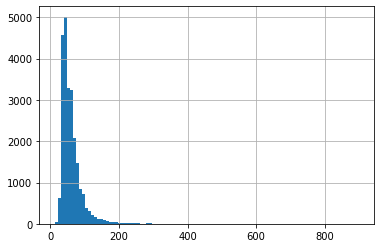

In [167]:
# investigate total_area; histogram of total_area
data_real_estate['total_area'].hist(bins=100)

<div class="alert alert-block alert-warning">
Maybe bins=100 is overdo here :)
</div>

In [168]:
# I see that there is extremely high value of total area
# find the 10 highest values
data_real_estate['total_area'].sort_values().tail(10)

12401    495.0
15016    500.0
5893     500.0
8018     507.0
4237     517.0
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, dtype: float64

In [169]:
data_real_estate.sort_values('total_area').tail(10)

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,pond_dist,ponds_within_3000,area_category,price2sq,day_of_week,month,year,floor_category,ratio_living_area,ratio_kitchen_area
12401,2017-06-19,14,1830000.0,7,25.0,347.5,495.0,0,4.65,7,...,NaN,0,area_11,3696.969697,0,6,2017,last,0.702020,0.050505
15016,2016-01-13,303,3000000.0,4,32.5,332.0,500.0,0,3.20,7,...,531.0,3,area_11,6000.000000,2,1,2016,last,0.664000,0.065000
5893,2017-05-31,50,4600000.0,6,40.0,332.0,500.0,0,NaN,7,...,198.0,2,area_11,9200.000000,2,5,2017,last,0.664000,0.080000
8018,2015-12-17,1078,1680000.0,5,45.5,301.5,507.0,1,4.45,7,...,NaN,0,area_11,3313.609467,3,12,2015,last,0.594675,0.089744
4237,2017-10-14,0,1000000.0,7,22.0,332.0,517.0,0,NaN,4,...,540.0,2,area_11,1934.235977,5,10,2017,other,0.642166,0.042553
5358,2019-02-14,14,1300000.0,15,100.0,409.0,590.0,0,3.50,6,...,NaN,0,area_13,2203.389831,3,2,2019,other,0.693220,0.169492
15651,2017-12-18,111,6000000.0,7,70.0,258.0,618.0,0,3.40,7,...,198.0,2,area_13,9708.737864,0,12,2017,other,0.417476,0.113269
3117,2019-03-30,0,2800000.0,7,60.0,322.3,631.0,0,NaN,5,...,210.0,2,area_14,4437.400951,5,3,2019,last,0.510777,0.095087
12859,2019-04-09,0,2800000.0,7,19.5,322.3,631.2,1,3.90,4,...,210.0,2,area_14,4435.994930,1,4,2019,last,0.510615,0.030894
19540,2017-12-06,106,8400000.0,12,112.0,409.7,900.0,0,2.80,25,...,318.0,2,area_20,9333.333333,2,12,2017,last,0.455222,0.124444


It seems like these high values are correct. It is not a typo because price per square foot varies from 1900 to 9500 and it is OK.

In [170]:
# Let's see how many apartments under 200 m^2
print('Rate of apartments with area under 200m2 {:.2f}'.format(
    data_real_estate.query('total_area < 200').shape[0] / data_real_estate.shape[0]))

Rate of apartments with area under 200m2 0.99


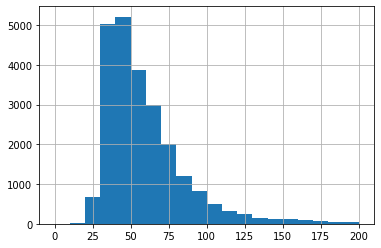

In [171]:
# let's look detailed histogram of total_area excluding extremely values
data_real_estate['total_area'].hist(bins=20, range=(0,200))

Histogram looks like Poisson distribution. There is a high peak at the begining and a long tail. <br>
Not surprising, because *total_area* is a discrete parameter and we record data for some period of time. <br>
Most of the values are in the range (37.5, 50.0]. I don't see anomalous values.

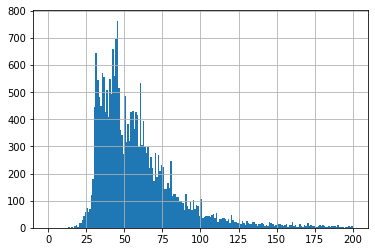

In [172]:
# let's look at detailed histogram of total_area excluding extreme values
data_real_estate['total_area'].hist(bins=200, range=(0,200))

Houses are of typical construction and apartments have typical areas.

#### Mini-results
It seems like extremely high values are correct. Price per square foot varies from 1900 to 9500 and it is OK. <br>
Overwhelming majority (99%) of apartments have total area under 200m2. <br>
Histogram looks like the Poisson distribution. Most of the values are in the range (37.5, 50.0].

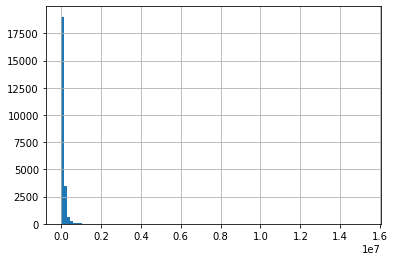

In [173]:
# investigate a price
data_real_estate['last_price'].hist(bins=100)

In [174]:
print('Maximum price is:',data_real_estate['last_price'].max())
print('Apartment with the highest total area has price:',
      data_real_estate.sort_values('total_area').tail(1)['last_price'].values[0])

Maximum price is: 15260000.0
Apartment with the highest total area has price: 8400000.0


In [175]:
# It is unbelievable that maximum price nearly two times higher than the price of apartment with the greatest total area
data_real_estate.sort_values('last_price').tail()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,pond_dist,ponds_within_3000,area_category,price2sq,day_of_week,month,year,floor_category,ratio_living_area,ratio_kitchen_area
15651,2017-12-18,111,6000000.0,7,70.000,258.0,618.0,0,3.4,7,...,198.0,2,area_13,9708.737864,0,12,2017,other,0.417476,0.113269
1436,2018-04-04,233,6600000.0,3,40.000,95.0,190.0,0,3.5,7,...,285.0,3,area_4,34736.842105,2,4,2018,other,0.500000,0.210526
14706,2016-02-20,393,8026000.0,5,24.000,204.0,401.0,3,NaN,9,...,478.0,1,area_8,20014.962594,5,2,2016,last,0.508728,0.059850
19540,2017-12-06,106,8400000.0,12,112.000,409.7,900.0,0,2.8,25,...,318.0,2,area_20,9333.333333,2,12,2017,last,0.455222,0.124444
12971,2017-09-30,33,15260000.0,7,34.365,250.0,400.0,2,NaN,10,...,756.0,3,area_8,38150.000000,5,9,2017,last,0.625000,0.085913


In [176]:
# I think the real price is 1 526 000 rather than  15 260 000. 
print('Price per square for this extra expensive apartment is :',
      data_real_estate.sort_values('last_price').tail(1)['price2sq'].values[0],
     '. It is too high.')
print('Median value Price per square is:',data_real_estate['price2sq'].median())
print('Average value Price per square is: {:.1f}'.format(data_real_estate['price2sq'].mean()))

Price per square for this extra expensive apartment is : 38150.0 . It is too high.
Median value Price per square is: 1900.0
Average value Price per square is: 1988.4


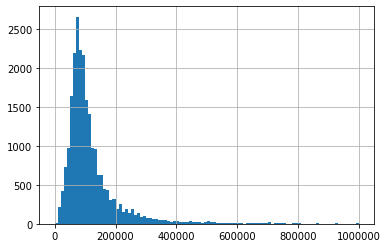

In [177]:
data_real_estate['last_price'].hist(bins=100, range=[0, 1e6])

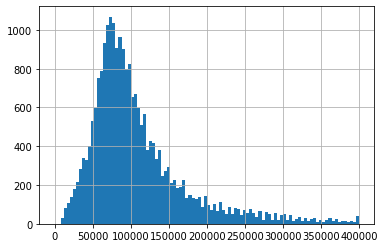

In [178]:
data_real_estate['last_price'].hist(bins=100, range=[0, 4e5])

#### Mini-results
I think I should clear data with this extraordinary prices. The best way to filter data by price per square unit <br>

In [179]:
# number of rooms
print('Maximum number of rooms is:',data_real_estate['bedrooms'].max())

Maximum number of rooms is: 19


In [180]:
data_real_estate.sort_values('bedrooms').tail()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,pond_dist,ponds_within_3000,area_category,price2sq,day_of_week,month,year,floor_category,ratio_living_area,ratio_kitchen_area
20829,2016-03-31,95,573180.0,14,25.900,168.3,245.4,0,NaN,4,...,118.0,2,area_5,2335.696822,3,3,2016,other,0.685819,0.105542
5358,2019-02-14,14,1300000.0,15,100.000,409.0,590.0,0,3.50,6,...,NaN,0,area_13,2203.389831,3,2,2019,other,0.693220,0.169492
18848,2015-03-02,1365,570000.0,16,13.000,180.0,270.0,1,3.00,4,...,NaN,0,area_6,2111.111111,0,3,2015,last,0.666667,0.048148
19392,2018-07-26,90,1420000.0,19,34.365,222.0,371.0,0,3.57,7,...,584.0,1,area_8,3827.493261,3,7,2018,other,0.598383,0.092628
14498,2018-06-09,114,645000.0,19,27.600,264.5,374.6,0,NaN,5,...,548.0,2,area_8,1721.836626,5,6,2018,other,0.706086,0.073679


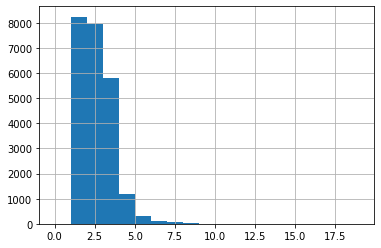

In [181]:
# histogram
data_real_estate['bedrooms'].hist(bins=19,range=[0,19])

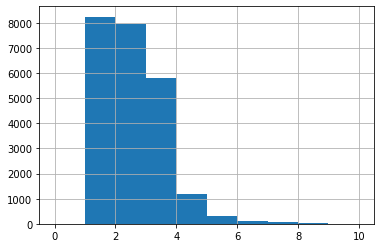

In [182]:
# histogram
data_real_estate['bedrooms'].hist(bins=10,range=[0,10])

#### Mini-results
I don't see something special. The most representative number of rooms are 1, 2 and 3. I expected to see such result. <br>

In [183]:
# ceiling height
print('Minimum ceiling height is:',data_real_estate['ceiling_height'].min())

Minimum ceiling height is: 1.0


I know this guys https://en.wikipedia.org/wiki/Hobbit :) But I think they live in New Zeland not Saint Petersburg.
It must be a mistake or typo.

In [184]:
print('Maximum ceiling height is:',data_real_estate['ceiling_height'].max())

Maximum ceiling height is: 100.0


Without any doubts ents found their houses. https://en.wikipedia.org/wiki/Ent. :)
It is a mistake or typo.

In [185]:
print('Median ceiling height:',data_real_estate['ceiling_height'].median())
print('Average ceiling height: {:.2f}'.format(data_real_estate['ceiling_height'].mean()))

Median ceiling height: 2.65
Average ceiling height: 2.77


In [186]:
data_real_estate.query('ceiling_height == ceiling_height').sort_values('ceiling_height', ascending=False).head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,pond_dist,ponds_within_3000,area_category,price2sq,day_of_week,month,year,floor_category,ratio_living_area,ratio_kitchen_area
22869,2018-07-25,19,300000.0,1,11.0,14.0,25.0,5,100.0,5,...,30.0,3,area_0,12000.000000,2,7,2018,last,0.560000,0.440000
22336,2019-04-05,0,199980.0,2,16.5,55.5,92.4,4,32.0,6,...,511.0,3,area_2,2164.285714,4,4,2019,other,0.600649,0.178571
3148,2018-11-12,0,58000.0,3,8.0,53.0,75.0,0,32.0,3,...,NaN,10,area_1,773.333333,0,11,2018,other,0.706667,0.106667
21377,2017-04-18,61,98000.0,1,11.0,37.7,42.0,2,27.5,24,...,NaN,0,area_0,2333.333333,1,4,2017,other,0.897619,0.261905
20478,2017-07-18,429,160000.0,1,10.0,22.0,45.0,1,27.0,4,...,449.0,3,area_1,3555.555556,1,7,2017,other,0.488889,0.222222


More likely 27.5 could be 2.75; 27.0 could be 2.7. It is true especially since these apartments have typical total areas for 1-room apartments. <br>
I will update this data using apply().

In [187]:
def ceiling_height_update(row):
    ceiling_height = row['ceiling_height']
    if ceiling_height == 32.0:
        return 3.20
    elif ceiling_height == 27.5:
        return 2.75
    elif ceiling_height == 27.0:
        return 2.70
    elif ceiling_height == 26.5:
        return 2.65
    elif ceiling_height == 26.0:
        return 2.60
    elif ceiling_height == 25.0:
        return 2.50
    elif ceiling_height == 24.0:
        return 2.40
    else:
        return ceiling_height

In [188]:
data_real_estate['ceiling_height']=data_real_estate.apply(ceiling_height_update, axis=1)

In [189]:
data_real_estate.query('ceiling_height == ceiling_height').sort_values('ceiling_height', ascending=False).head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,pond_dist,ponds_within_3000,area_category,price2sq,day_of_week,month,year,floor_category,ratio_living_area,ratio_kitchen_area
22869,2018-07-25,19,300000.0,1,11.0,14.0,25.0,5,100.0,5,...,30.0,3,area_0,12000.000000,2,7,2018,last,0.560000,0.440000
20507,2018-02-19,40,119000.0,2,13.0,35.0,60.0,1,22.6,14,...,NaN,0,area_1,1983.333333,0,2,2018,other,0.583333,0.216667
17496,2019-02-19,0,134000.0,3,12.0,53.2,92.9,5,20.0,17,...,NaN,0,area_2,1442.411195,1,2,2019,other,0.572659,0.129171
15061,2018-05-11,315,112000.0,2,9.1,32.4,56.4,2,14.0,14,...,NaN,0,area_1,1985.815603,4,5,2018,other,0.574468,0.161348
22309,2017-09-30,136,106000.0,1,9.0,15.5,45.0,0,10.3,16,...,450.0,2,area_1,2355.555556,5,9,2017,other,0.344444,0.200000


22.6, 20.0, 14.0, 10.3 are mistakes too. But it is hard to determine the correct value. <br>
Maybe it is better to divide by groups *total_area* and then determine approximate values.

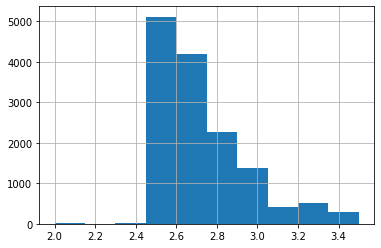

In [190]:
# histogram
data_real_estate['ceiling_height'].hist(bins=10,range=[2,3.5])

#### Mini-results
I corrected some apparently typos such as 27.5 -> 2.75. <br>
I found extremely strange values such as 100m of ceiling_height, where total area is only 25.0 m2 and price overwhelmed 300000.0. <br>
Also I found extremely small values.

<div class="alert alert-block alert-success">
Seems right
</div>

## Step 4.2
* Examine the time it's taken to sell the apartment and plot a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered to have happened rather quickly or taken an extra long time?

In [191]:
# we remember that zeros-values are None
print('We have only {:.2f} of all data with not empty days_listed'.format(
            len(data_real_estate[data_real_estate['days_listed'] != 0]) /
            len(data_real_estate)))

We have only 0.87 of all data with not empty days_listed


In [192]:
print('Minimal days listed:',data_real_estate[data_real_estate['days_listed'] != 0]['days_listed'].min())
print('Maximum days listed:',data_real_estate[data_real_estate['days_listed'] != 0]['days_listed'].max())
# so, minimal day when apartment was in list is 1

Minimal days listed: 1
Maximum days listed: 1580


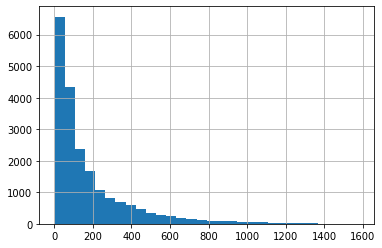

In [193]:
# build a histogram from 1 to exclude None-values
data_real_estate['days_listed'].hist(
        range=[data_real_estate[data_real_estate['days_listed'] != 0]['days_listed'].min(),
          data_real_estate[data_real_estate['days_listed'] != 0]['days_listed'].max()],
        bins=30
            )

As I can see approximately 6500+4500+2500+1500=15000 apartments from 23700 ones have been listed (more likely have been sold) for 200 days. It is ~ 63%.

In [194]:
print('Median days listed:', data_real_estate.query('0 < days_listed')['days_listed'].median())
print('Average days listed:', data_real_estate.query('0 < days_listed')['days_listed'].mean())

Median days listed: 95.0
Average days listed: 180.88863436982163


Average days nearly twice higher than mean-value. That means that there is a long and/or hard tail in distribution of days_listed. <br>
It is interesting to reveal why some apartments have been sold quicker than others. <br>
I think that several factors could play the role: price and number of rooms. Let's check it

In [195]:
# price should be the main factor. First let's check globally without dividing by groups.
# select apartments sold quickly (50%) and find average and median values
print('---quick sold apartments---')
print('Median last price for quick sold apartments:',
      data_real_estate.query('0 < days_listed <= 95')['last_price'].median())
print('Average last price for quick sold apartments:',
      data_real_estate.query('0 < days_listed <= 95')['last_price'].mean())

# to select apartments sold slowly (50%)
print('---slow sold apartments---')
print('Median last price for quick sold apartments:',
      data_real_estate.query('days_listed > 95')['last_price'].median())
print('Average last price for quick sold apartments:',
      data_real_estate.query('days_listed > 95')['last_price'].mean())

---quick sold apartments---
Median last price for quick sold apartments: 87000.0
Average last price for quick sold apartments: 111551.61250730568
---slow sold apartments---
Median last price for quick sold apartments: 95000.0
Average last price for quick sold apartments: 139114.09529847835


So the difference is about 8%. This is a big number when we're dealing with apartments. <br>
BUT! This contrast could be explained by the fact that bigger apartments could be sold slower. And of course they are more expensive. <br>
Let's see how many bedrooms in these apartments.

In [196]:
# group apartments by number of bedrooms
data_real_estate.query('0 < days_listed <= 95 and bedrooms > 0').groupby('bedrooms')['days_listed'].count()

bedrooms
1     4102
2     3549
3     2156
4      334
5       80
6       24
7       14
8        1
9        1
10       2
14       1
15       1
19       1
Name: days_listed, dtype: int64

In [197]:
def fun_rooms_category(row):
    room = row['bedrooms']
    if room == 1:
        return '1-room'
    elif room == 2:
        return '2-room'
    elif room == 3:
        return '3-room'
    elif room > 3:
        return 'many-room'
    else:
        return None
    
data_real_estate['rooms_cat'] = data_real_estate.apply(fun_rooms_category, axis=1)

In [198]:
# so number of apartments in each groups
data_real_estate.query('0 < days_listed <= 95 and bedrooms > 0').groupby('rooms_cat')['days_listed'].count()

rooms_cat
1-room       4102
2-room       3549
3-room       2156
many-room     459
Name: days_listed, dtype: int64

In [199]:
print('Share of quick sold apartments:',
     data_real_estate.query('0 < days_listed <= 95 and bedrooms > 0').groupby('rooms_cat')['days_listed'].count() / 
     data_real_estate.query('0 < days_listed <= 95 and bedrooms > 0').groupby('rooms_cat')['days_listed'].count().sum() * 100)

Share of quick sold apartments: rooms_cat
1-room       39.957140
2-room       34.570427
3-room       21.001364
many-room     4.471070
Name: days_listed, dtype: float64


In [200]:
# the similar table for slow sold apartments
print('Share of slow sold apartments:',
     data_real_estate.query('days_listed > 95').groupby('rooms_cat')['days_listed'].count() / 
     data_real_estate.query('days_listed > 95').groupby('rooms_cat')['days_listed'].count().sum() * 100)

Share of slow sold apartments: rooms_cat
1-room       32.676551
2-room       32.813110
3-room       25.994928
many-room     8.515412
Name: days_listed, dtype: float64


In [201]:
# take look of detailed price table for quick sold apartments
print('Price of quick sold apartments:',
     data_real_estate.query('0 < days_listed <= 95 and bedrooms > 0').groupby('rooms_cat')['last_price'].median())

Price of quick sold apartments: rooms_cat
1-room        71000.0
2-room        93000.0
3-room       119000.0
many-room    182000.0
Name: last_price, dtype: float64


In [202]:
# the same for slow sold apartments
print('Price of quick sold apartments:',
     data_real_estate.query('days_listed > 95 and bedrooms > 0').groupby('rooms_cat')['last_price'].median())

Price of quick sold apartments: rooms_cat
1-room        71000.0
2-room        94000.0
3-room       124000.0
many-room    224000.0
Name: last_price, dtype: float64


As I expected, share of 1-room apartments in quick group higher than in slow group.
But it was mistake to think that price of 1-room apartments is different. Median values are the same.
At the same time, many-room apartment which are higher in price are sold slower.

In [203]:
# what about super fast apartments?
# 2 weeks is really fast
print('Price of quick sold apartments:',
     data_real_estate.query('0 < days_listed <= 14 and bedrooms > 0').groupby('rooms_cat')['last_price'].median())

Price of quick sold apartments: rooms_cat
1-room        72000.0
2-room        92300.0
3-room       119000.0
many-room    168000.0
Name: last_price, dtype: float64


In [204]:
# what about super slow apartments?
# 180 days (~half a year) is really slow
print('Price of quick sold apartments:',
     data_real_estate.query('days_listed > 180').groupby('rooms_cat')['last_price'].median())

Price of quick sold apartments: rooms_cat
1-room        71750.0
2-room        94000.0
3-room       124000.0
many-room    226000.0
Name: last_price, dtype: float64


So total price doesn't rule the game. Maybe it is better to look at price per meter? 

In [205]:
# what about super fast apartments?
# 2 weeks is really fast
print('Price of quick sold apartments:',
     data_real_estate.query('0 < days_listed <= 14 and bedrooms > 0').groupby('rooms_cat')['price2sq'].median())

Price of quick sold apartments: rooms_cat
1-room       2043.894049
2-room       1869.357082
3-room       1758.620690
many-room    1792.424242
Name: price2sq, dtype: float64


In [206]:
# what about super fast apartments?
# 180 days (~half a year) is really slow
print('Price of quick sold apartments:',
     data_real_estate.query('days_listed > 180').groupby('rooms_cat')['price2sq'].median())

Price of quick sold apartments: rooms_cat
1-room       2000.000000
2-room       1797.802198
3-room       1758.620690
many-room    1890.798787
Name: price2sq, dtype: float64


Surprisingly, price per meter doesn't influence on how fast apartment could be sold. <br>
What if I get this result due to inflation? 

In [207]:
# what about super fast apartments? group by year
# 2 weeks is really fast
print('Price of quick sold apartments:',
     data_real_estate.query('0 < days_listed <= 14 and bedrooms > 0').groupby('year')['price2sq'].median())

Price of quick sold apartments: year
2016    1933.216783
2017    1862.909091
2018    1928.571429
2019    2094.017094
Name: price2sq, dtype: float64


In [208]:
# all apartments and all years
print('Price of quick sold apartments:',
     data_real_estate.groupby('year')['price2sq'].median())

Price of quick sold apartments: year
2014    2140.000000
2015    1868.292683
2016    1834.862385
2017    1851.301769
2018    1913.793103
2019    2066.115702
Name: price2sq, dtype: float64


It is magic. Apartments that sell fast have even higher prices!
Maybe they have a good location and people are really want to buy them.

#### Mini-results
I found that price doesn't hardly influence on how fast apartments have been sold.
I found that 1-room apartments have been sold faster. Many-room apartments sell slower

## Step 4.3 Remove rare and outlying values and describe the patterns you've discovered
Am I right that I am only now remove rare data? I don't understand why I should remove them. I don't see that this data has a problem like it was in gas stations. I do it only because it is in project. <br>
The one reason is to study typical apartments.

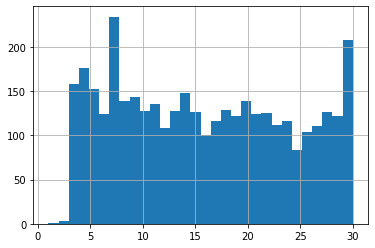

In [209]:
# how many of apartments have been sold too quickly? is there anomalies?
data_real_estate['days_listed'].hist(
        range=[data_real_estate[data_real_estate['days_listed'] != 0]['days_listed'].min(), 30],
        bins=30
            )

No, there is no any anomalies in the head. It is OK

In [210]:
# I will cut tail of days listed
# mean and standard deviation
print('Average days listed:', data_real_estate['days_listed'].mean())
print('Standard deviation days listed:', data_real_estate['days_listed'].std())
mean_days_listed = data_real_estate['days_listed'].mean()
std_days_listed = data_real_estate['days_listed'].std()

# 3-sigma filter
data_real_estate_filt_days = data_real_estate.query('days_listed < @mean_days_listed + 3*@std_days_listed')                        

Average days listed: 156.60884425503187
Standard deviation days listed: 213.54687293841351


In [211]:
print('Share of deleted rows (%):', (len(data_real_estate) - len(data_real_estate_filt_days)) / len(data_real_estate) * 100)

Share of deleted rows (%): 2.523313219967087


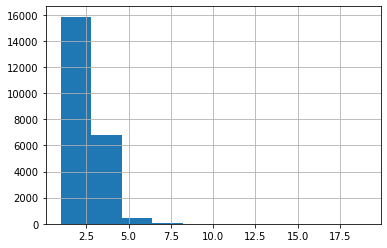

In [212]:
# outlying values: bedrooms
data_real_estate_filt_days['bedrooms'].hist()

# filter bedrooms with 5+ beds
data_real_estate_filt_beds = data_real_estate_filt_days.query('bedrooms <= 5')

In [213]:
print('Share of deleted rows (%):',
      (len(data_real_estate_filt_days) - len(data_real_estate_filt_beds)) / len(data_real_estate_filt_days) * 100)

Share of deleted rows (%): 0.8094887667200554


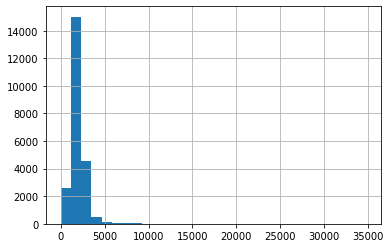

In [214]:
# outlying values: price per square
data_real_estate_filt_beds['price2sq'].hist(bins=30)

# filter bedrooms with 5000 per square
data_real_estate_filt_price = data_real_estate_filt_beds.query('price2sq <= 5000')

In [215]:
print('Share of deleted rows (%):',
      (len(data_real_estate_filt_beds) - len(data_real_estate_filt_price)) / len(data_real_estate_filt_beds) * 100)

Share of deleted rows (%): 1.0648511826830758


In [216]:
data_real_estate_final = data_real_estate_filt_price

#### Mini-results
I have filtered outliers. Thus I can analyse typical data.

<div class="alert alert-block alert-success">
And you did it greatly :)
</div>

## Step 4.4 Which factors have had the biggest influence on an apartment’s price?
Examine whether the value depends on the total square area, number of rooms, floor (top or bottom), or the proximity to the city center area. Also check whether the publication date has any effect on the price: specifically, day of the week, month, and year. Note that using scatter plot is preferable to hexbin. If you do decide to use hexbin, please use scatter plot too, and then compare the results. It is also recommended to check the hexbin documentation and carefully study its parameters.

I've analysed some factors: total area and number of rooms. I don't think that result have been changed.

Text(0, 0.5, 'last_price')

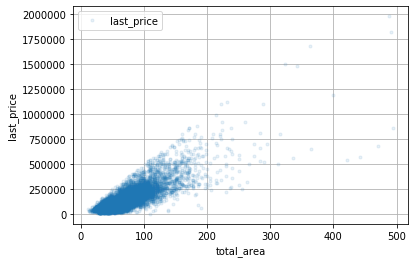

In [217]:
data_real_estate_final.plot(x='total_area', y='last_price', style='.', grid=True, legend=True, alpha=0.1)
plt.xlabel('total_area')
plt.ylabel('last_price')

Greater total_area, than greater last_price. As we filtered data, we see it on plot

Text(0, 0.5, 'last_price')

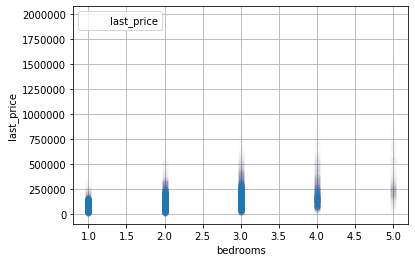

In [218]:
data_real_estate_final.plot(x='bedrooms', y='last_price', style='o', grid=True, legend=True, alpha=0.003)
plt.xlabel('bedrooms')
plt.ylabel('last_price')

Results are the same as previous

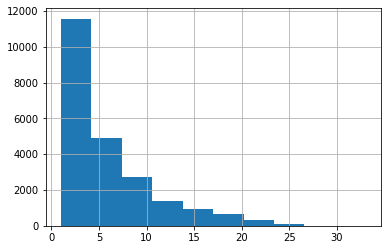

In [219]:
# floor
data_real_estate_final['floor'].hist()

Text(0, 0.5, 'last_price')

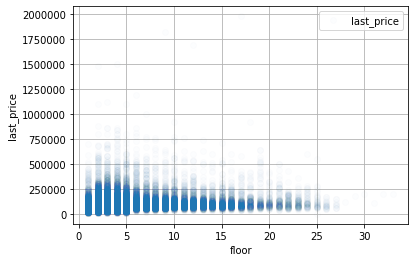

In [220]:
data_real_estate_final.plot(x='floor', y='last_price', style='o', grid=True, legend=True, alpha=0.01)
plt.xlabel('floor')
plt.ylabel('last_price')

Number of Floor doesn't influence on price so strongly as total area.

In [221]:
data_real_estate_final.query('bedrooms == 1').groupby('floor_category')['last_price'].median()

floor_category
first    60150.0
last     64000.0
other    73004.0
Name: last_price, dtype: float64

In [222]:
data_real_estate_final.groupby('floor_category')['last_price'].median()

floor_category
first    77000.0
last     84345.0
other    95000.0
Name: last_price, dtype: float64

So, last and the first floors has lower last price than others.

Text(0, 0.5, 'last_price')

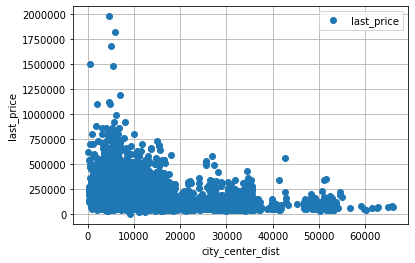

In [223]:
# city_center_dist
data_real_estate_final.plot(x='city_center_dist', y='last_price', style='o', grid=True, legend=True, alpha=1)
plt.xlabel('city_center_dist')
plt.ylabel('last_price')

In [224]:
print(data_real_estate_final['city_center_dist'].corr(data_real_estate_final['last_price']))

-0.31564509673272684


So, there are no any extremely high priced apartments far from the city center.
And I see negative correlation between these parameters.

<div class="alert alert-block alert-success">
Which is understandable :)
</div>

Text(0, 0.5, 'last_price')

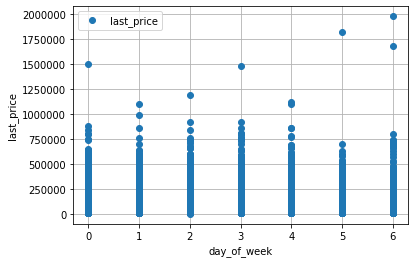

In [225]:
# day_of_week
data_real_estate_final.plot(x='day_of_week', y='last_price', style='o', grid=True, legend=True, alpha=1)
plt.xlabel('day_of_week')
plt.ylabel('last_price')

In [226]:
print(data_real_estate_final['day_of_week'].corr(data_real_estate_final['last_price']))

-0.006523776955360214


Day of week does not influence at all

Text(0, 0.5, 'last_price')

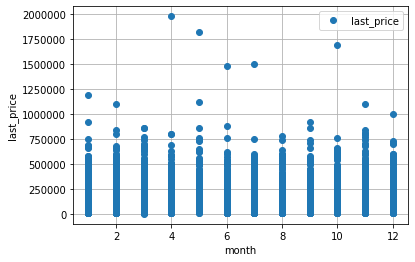

In [227]:
data_real_estate_final.plot(x='month', y='last_price', style='o', grid=True, legend=True, alpha=1)
plt.xlabel('month')
plt.ylabel('last_price')

In [228]:
print(data_real_estate_final['month'].corr(data_real_estate_final['last_price']))

0.0006166404527388503


Text(0, 0.5, 'last_price')

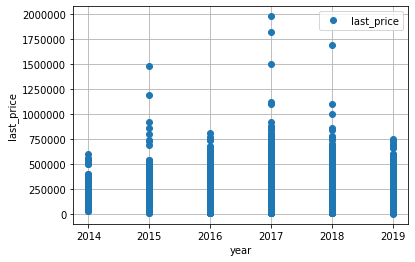

In [229]:
data_real_estate_final.plot(x='year', y='last_price', style='o', grid=True, legend=True, alpha=1)
plt.xlabel('year')
plt.ylabel('last_price')

In [230]:
print(data_real_estate_final['year'].corr(data_real_estate_final['last_price']))

-0.027468402714933848


In [231]:
data_real_estate_final.groupby('year')['last_price'].median()

year
2014    159000.0
2015    101340.0
2016     88600.0
2017     89800.0
2018     90000.0
2019    100000.0
Name: last_price, dtype: float64

After crysis people can't pay high price for apartment. Inflation every year after 2016 increase cost of apartment.

# Step 5. Overall conclusion
Finally. I have gotten rid of mistakes and outliers. I have changed types of some columns. <br>
Price of apartment mostly depends on: total area, is apartment on the first/last floor or not and distance from the center. I have created some pivot tables and plots to show it. From year to year price of apartments changed. <br>
It could be interesting to perform a more detailed investigation for each year.